In [1]:
import cv2 as cv
import pickle
import numpy as np
import math
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
d = unpickle('../data/data_batch_1')

In [4]:
s_visited = [0] * 10
pic_array = []
total = 0
for index, labels in enumerate(d[b'labels']):
    if s_visited[labels] == 0:
        pic_array.append(d[b'data'][index].reshape(3, 32, 32))
        total += 1
        s_visited[labels] = 1
        if total >= 10:
            break

In [5]:
len(pic_array)

10

In [50]:
def show_pic(img, rank):

    img = img.transpose(1, 2, 0)
    dst = cv.Canny(img, 50, 200)
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    blur = cv.medianBlur(gray, 3)
    f, axarr = plt.subplots(1, 4, figsize=(15, 15)) 
    axarr[0].imshow(img)
    axarr[1].imshow(dst, cmap='gray', vmin=0, vmax=255)
    axarr[2].imshow(gray, cmap='gray', vmin=0, vmax=255)
    axarr[3].imshow(blur, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    para_list = [[1, np.pi / 180, 18], [1, np.pi / 180, 20], [1.1, np.pi / 180, 20], [1, np.pi * 2 / 180, 20], [1.1, np.pi * 1.9 / 180, 20]]
    img_list = []
    for para in para_list:
        lines = cv.HoughLines(dst, para[0], para[1], para[2])
        cdst = cv.cvtColor(img, cv.COLOR_RGB2BGR)
        if lines is not None:
            for i in range(0, len(lines)):
                rho = lines[i][0][0]
                theta = lines[i][0][1]
                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho
                y0 = b * rho
                pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
                pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
                cv.line(cdst, pt1, pt2, (0, 0, 255), 1, cv.LINE_AA)
        res = cv.cvtColor(cdst, cv.COLOR_BGR2RGB)
        img_list.append(res)
    
    f, axarr = plt.subplots(1, 5, figsize=(15, 15))
    for i in range(5):
        axarr[i].imshow(img_list[i])
    plt.show()
    
    rows = gray.shape[0]
    para_list2 = [[1, rows / 8, 100, 15], [1, rows / 4, 100, 15], [1.5, rows / 8, 100, 15], 
             [1, rows / 8, 150, 15], [1, rows / 8, 100, 20], [1.5, rows / 4, 70, 29]]
    img_list2 = []
    for para in para_list2:
        circles = cv.HoughCircles(blur, cv.HOUGH_GRADIENT, para[0], para[1], param1=para[2], param2=para[3], minRadius=1, maxRadius=30)
        src = cv.cvtColor(img, cv.COLOR_RGB2BGR)
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                center = (i[0], i[1])
                # circle center
                cv.circle(src, center, 1, (0, 100, 100), 1)
                # circle outline
                radius = i[2]
                cv.circle(src, center, radius, (255, 0, 255), 1)
        res = cv.cvtColor(src, cv.COLOR_BGR2RGB)
        img_list2.append(res)
    
    f, axarr = plt.subplots(1, 6, figsize=(15, 15))
    for i in range(6):
        axarr[i].imshow(img_list2[i])
    plt.show()

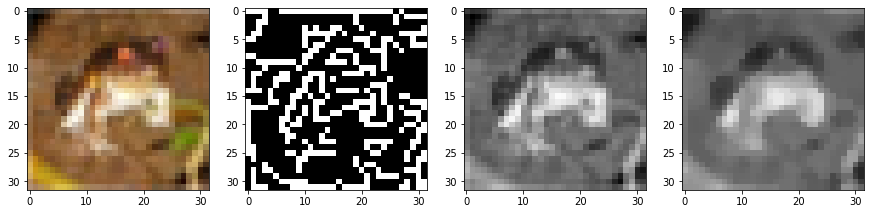

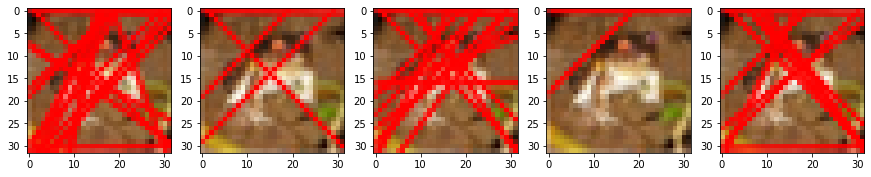

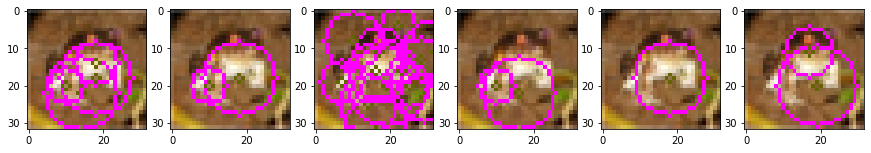

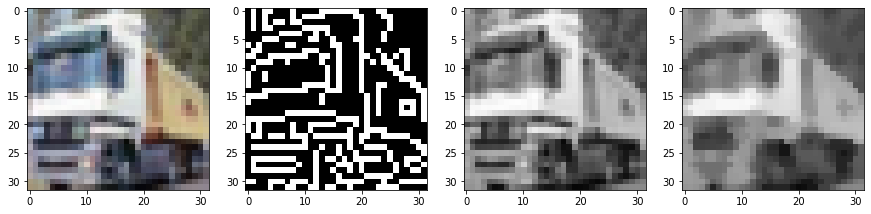

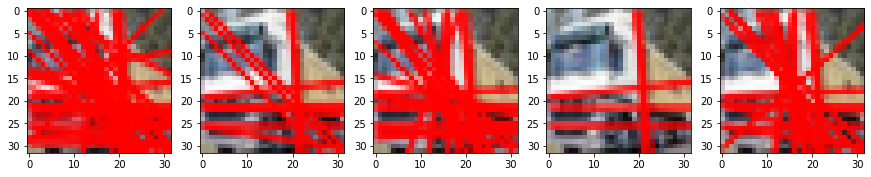

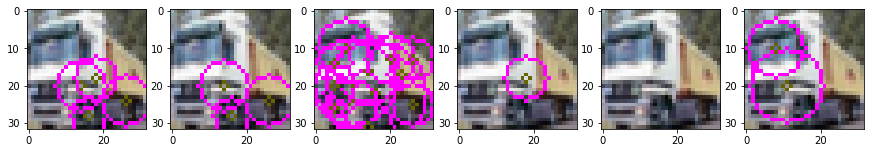

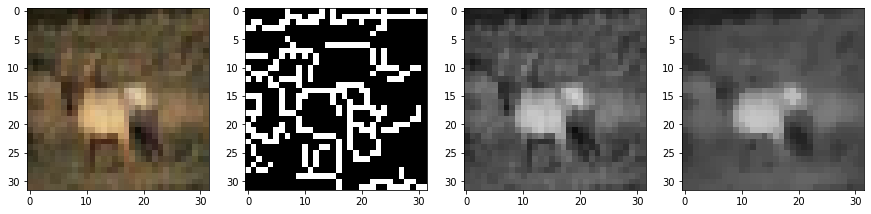

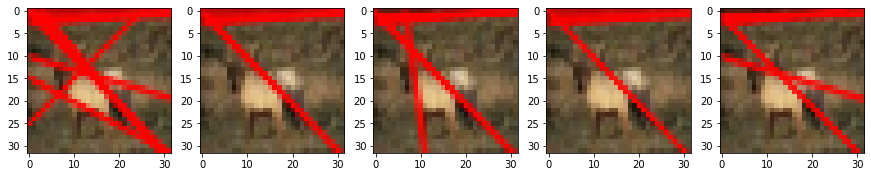

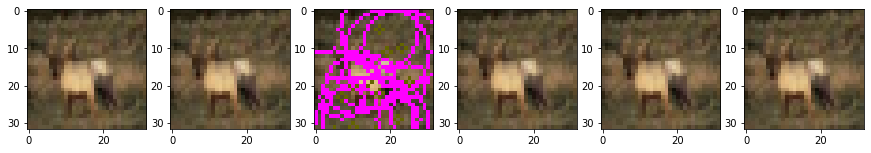

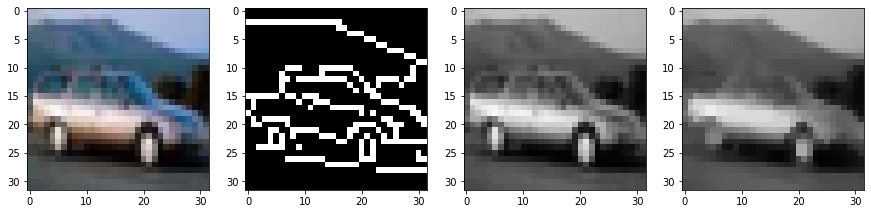

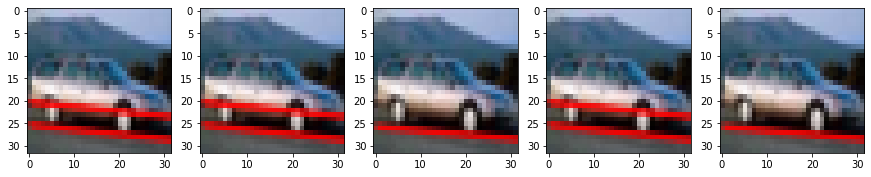

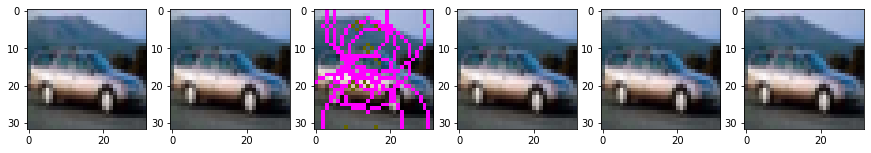

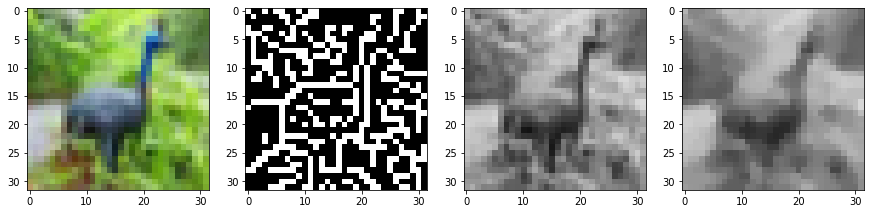

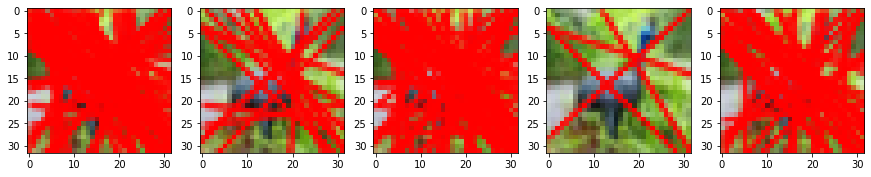

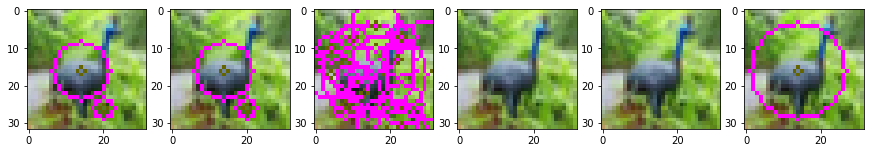

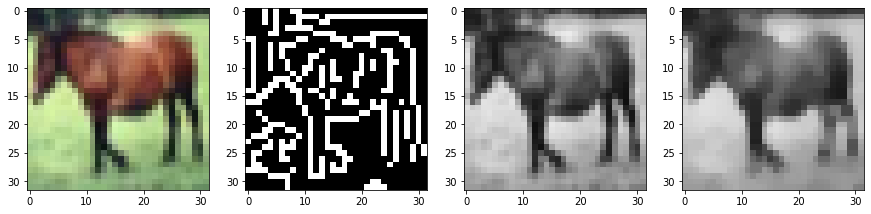

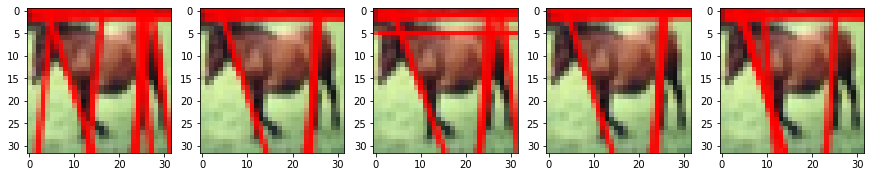

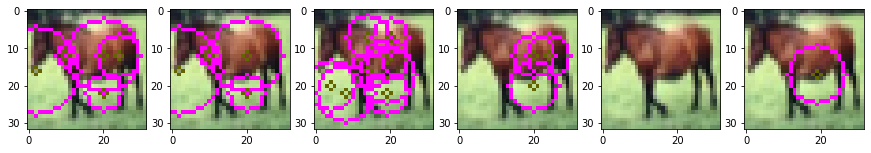

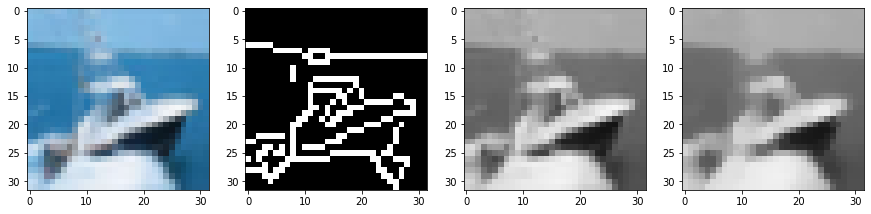

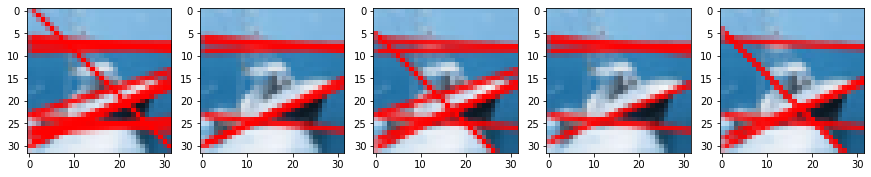

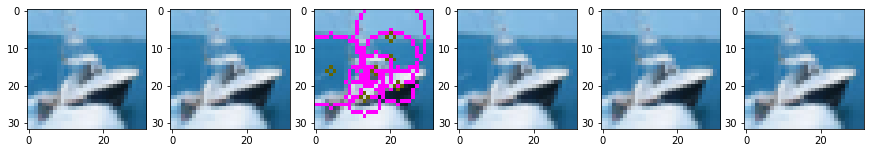

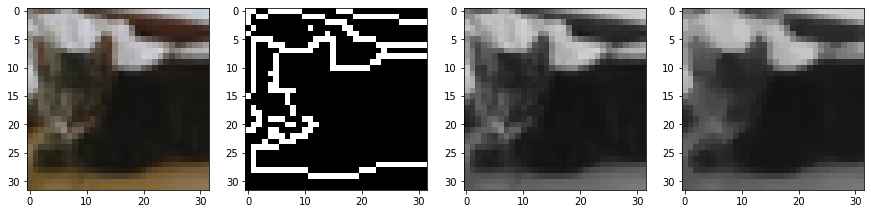

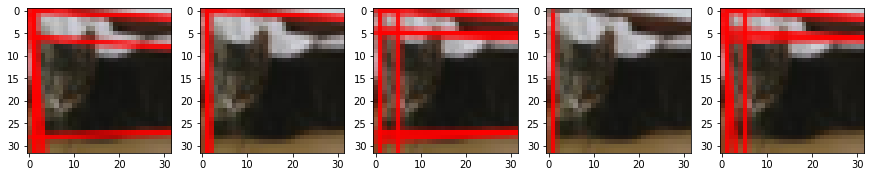

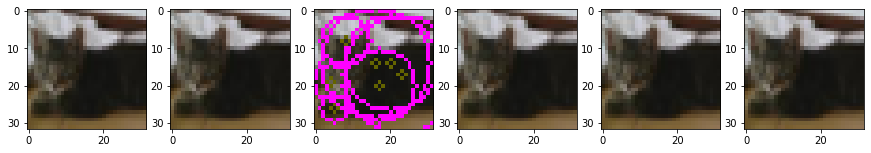

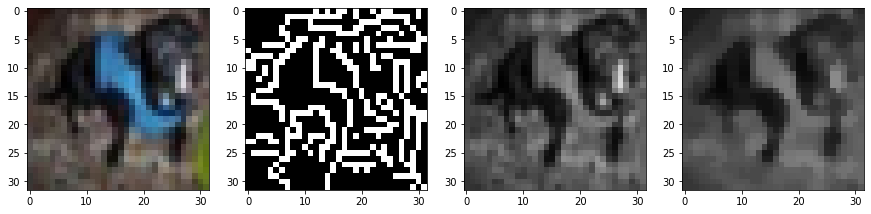

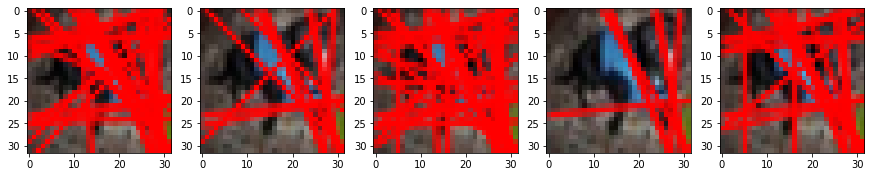

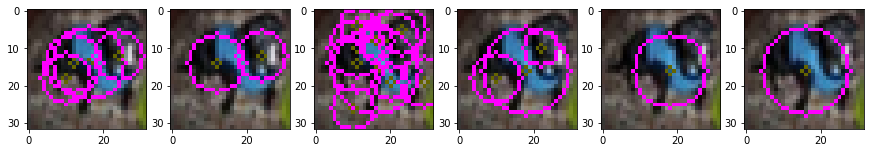

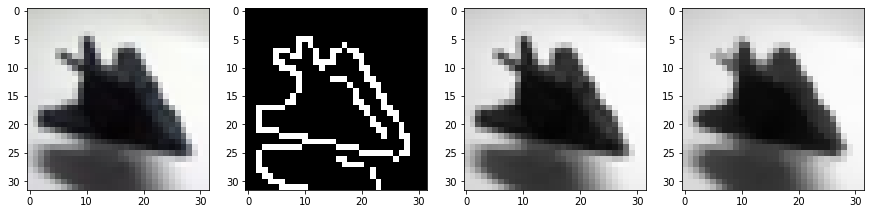

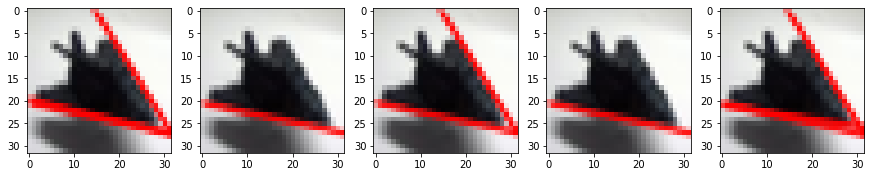

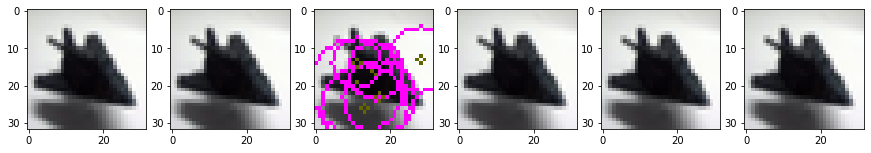

In [51]:
for index, img in enumerate(pic_array):
    show_pic(img, index)